# Đồ Án Cuối Kỳ


Thành viên 1:

    Họ tên: ...

    MSSV: ...


Thành viên 2:

    Họ tên: ...

    MSSV: ...
    

## Môi trường code

In [1]:
import sys
sys.executable

'/home/nson/anaconda3/bin/python'

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np

## Thu thập dữ liệu

Trong bài này, ta sẽ dùng dữ liệu đã được thu thập sẵn là file "data.csv" đính kèm; đây là dữ liệu về thông tin của một sản phẩm sau khi được đặt từ 1 trang web bán hàng . Dữ liệu này được lấy từ các nhóm tại PromptCloud và DataStock [ở đây](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

## Khám phá dữ liệu

## Đọc dữ liệu từ file csv

In [3]:
product_df = pd.read_csv('data.csv')
product_df.head()

# df.to_csv('out1.csv', sep='\t', encoding='utf-8')

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.00,799.00,Amazon In,60.05%,NaN,YES,B072BGHNJ1,https://images-na.ssl-images-amazon.com/images...
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.00,2040.00,Amazon In,0%,NaN,YES,B07QDTZYSJ,https://images-na.ssl-images-amazon.com/images...
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824.00,1042.00,Amazon In,42.87%,NaN,YES,B07DCSN8MP,https://images-na.ssl-images-amazon.com/images...
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185.00,1399.00,Amazon In,35.97%,NaN,YES,B07GLW9VQN,https://images-na.ssl-images-amazon.com/images...
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06 +0000,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594.00,570.00,Amazon In,4.04%,NaN,YES,B07NFYYLF1,https://images-na.ssl-images-amazon.com/images...


## Bỏ Các Dòng Không Phải Thông Tin Product

In [4]:
product_df = product_df.dropna(how='all', subset=['Crawl Timestamp'], axis=0)

### Dữ liệu có bao nhiêu dòng và cột?

In [5]:
num_rows = len(product_df.values)
num_cols = len(product_df.loc[0])

print(num_cols,num_rows)

15 30000


### Ý nghĩa của mỗi dòng. Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu từ các nhóm tại PromptCloud và DataStock và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của một một sản phẩm đang được trưng bày bán. Có vẻ không có dòng nào bị "lạc loài".

### Dữ liệu có các dòng bị lặp không?

In [6]:
have_duplicated_rows = product_df["Uniq Id"].duplicated().any()
if have_duplicated_rows:
    print('Có')
else :
    print ('Không')

Không


### Ý nghĩa của mỗi cột

Dưới đây là phần mô tả dữ liệu từ các nhóm tại PromptCloud và DataStock về các cột trong file "data.csv":
- **Uniq Id**: a unique identifier for each product.
- **Crawl Timestamp**: Data collection time for this product.
- **Category**: Product category.
- **Product Title**: where you list your product in an eCommerce store.
- **Product Description**: Detailed description of the product
- **Brand**: The brand that owns the Product.
- **Pack Size Or Quantity**: Size and quantity of products available.
- **Mrp**: .
- **Price**: price of this product.
- **Site Name**: the name of the website that is selling the product.
- **Offers**: Percentage on offer
- **Combo Offers**: combo packages.
- **Stock Availibility**: the product is available or not (if the product is available, it is YES, if it is not, it is NO) .
- **Product Asin**: ASIN (Amazon Standard Identification Number) is one of the unique product identifiers used for managing the Amazon product catalog. In a technical sense, it's a 10-digit code made up of numbers and letters.
- **Image Urls**: Link to the product's profile picture.

### Mỗi cột có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `df` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 


In [7]:
col_dtypes = product_df.dtypes
col_dtypes
product_df.head(5)


def check_dtype_element(s):
    return type(s)
def open_object_dtype(s):
    dtypes = set(s.apply(check_dtype_element))
    return dtypes

In [8]:
open_object_dtype(product_df["Image Urls"])

{str}

### Cột có dtype là object nghĩa là sao?

Ta cần biết tập các kiểu dữ liệu thật sự có trong mỗi cột để dễ dàng tiền xử lý

`product_df` có 4 cột có `dtype` là `object`: "Date", "LocationDescription", "District", "CommunityArea". Trong Pandas, kiểu dữ liệu `object` thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). Nếu một cột trong dataframe có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau; để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu, ví dụ `type(s.iloc[i])` với `s` là một cột. Lúc đọc dữ liệu từ file "mvt.csv" lên, nếu bạn để ý thì sẽ thấy warning là: "Columns (6,7) have mixed types", nghĩa là cột 6 ("District") và 7 ("CommunityArea") có `dtype` không đồng nhất (trong nội bộ mỗi cột). Ta muốn xem thử trong nội bộ mỗi cột này có các kiểu dữ liệu nào.

## Tiền xử lý (nếu cần)

Ta sẽ tiền xử lý các cột `Crawl Timestamp`,`Mrp`, `Price`, `Offers`

In [9]:
product_df["Mrp"] =  product_df["Mrp"].str.lstrip('.').astype(float)
product_df["Crawl Timestamp"] = product_df["Crawl Timestamp"].astype('datetime64[s]')
product_df["Price"] =  product_df["Price"].str.lstrip('.').astype(float)
product_df["Offers"] = product_df["Offers"].str.replace('%','').astype(float) / 100

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột numeric, các giá trị được phân phối như thế nào?

Với mỗi cột numeric bạn sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Bạn lưu kết quả vào dataframe nume_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có n cột (n là số cột numeric)

In [10]:
# YOUR CODE HERE
nume_col_profiles_df = pd.Series([])

def missing_ratio(s):
    return s.isna().mean() * 100

nume_col_profiles_df = pd.concat([product_df['Mrp'],product_df['Price'],product_df['Crawl Timestamp'],\
                                  product_df['Offers']], axis=1)
nume_col_profiles_df = nume_col_profiles_df.agg([missing_ratio, pd.Series.min, pd.Series.max])

/home/nson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [11]:
nume_col_profiles_df

,Mrp,Price,Crawl Timestamp,Offers
missing_ratio,2.33,2.0,0,1.553333
min,12.00,12.0,2019-10-28 14:30:19,0.000000
max,80000.00,21990.0,2019-10-31 19:13:19,0.972400


### Nhận xét về "missing_ratio", "min", "max" của các cột numeric

missing_ratio và Min và max của các cột có vẻ không có gì bất thường.

### Với mỗi cột categorical, các giá trị được phân phối như thế nào?

Với mỗi cột categorical, bạn tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Bạn lưu kết quả vào dataframe cate_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có n cột là (n là số lượng cột categorical)

In [12]:
# YOUR CODE HERE
cate_col_profiles_df = pd.Series([])


def num_diff_vals(s):
    return pd.Series.nunique(s.dropna())

def diff_vals(s):
    s=s.dropna()
    return pd.Series.unique(s.dropna())


def missing_ratio(s):
    return s.isna().mean() * 100

cate_col_profiles_df = pd.concat([product_df['Uniq Id'],product_df['Category'],product_df['Product Title'],\
                                  product_df['Product Description'],product_df['Brand'],product_df['Site Name'],\
                                  product_df['Combo Offers'],product_df['Stock Availibility'],product_df['Product Asin'],\
                                 product_df['Image Urls']], axis=1)
cate_col_profiles_df = cate_col_profiles_df.agg([missing_ratio,num_diff_vals,diff_vals ])

/home/nson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [13]:
cate_col_profiles_df

,Uniq Id,Category,Product Title,Product Description,Brand,Site Name,Combo Offers,Stock Availibility,Product Asin,Image Urls
missing_ratio,0,0,0,6.63333,0.29,0,99.8767,0,0,0
num_diff_vals,30000,6,29630,22584,8454,1,36,2,30000,29578
diff_vals,"[eb49cc038190f6f03c272f79fbbce894, 1657cc30c43...","[Skin Care, Grocery & Gourmet Foods, Bath & Sh...",[ Lee posh Lactic Acid 60% Anti ageing Pigment...,[PROFESSIONAL GRADE Face Peel: this peel stimu...,"[Lee Posh, SLB Works, Generic, Harveys, ShiKai...",[Amazon In],[ Myoc Neem Face Wash: Buy 2 Neem face Wash 10...,"[YES, NO]","[B072BGHNJ1, B07QDTZYSJ, B07DCSN8MP, B07GLW9VQ...",[https://images-na.ssl-images-amazon.com/image...


### Nhận xét về "missing_ratio", "num_diff_vals", "diff_vals" của các cột categorical

## 

In [14]:
# YOUR CODE HERE
series = product_df['Mrp'] *   product_df['Offers']
series.name = "price is reduced"

product_df = pd.concat([product_df,series],axis=1)
product_df

# top5 = product_df[product_df['Category'].isin([2012,2011,2010])].groupby(["LocationDescription"]).size()



# product_df
# def cal_price_offers()
# S_Month = mvt_df['Date'].dt.month
# S_Month.name = 'Month'
# mvt_df = pd.concat([mvt_df,S_Month],axis = 1)

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls,price is reduced
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.0,799.0,Amazon In,0.6005,NaN,YES,B072BGHNJ1,https://images-na.ssl-images-amazon.com/images...,1201.0000
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.0,2040.0,Amazon In,0.0000,NaN,YES,B07QDTZYSJ,https://images-na.ssl-images-amazon.com/images...,0.0000
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824.0,1042.0,Amazon In,0.4287,NaN,YES,B07DCSN8MP,https://images-na.ssl-images-amazon.com/images...,781.9488
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185.0,1399.0,Amazon In,0.3597,NaN,YES,B07GLW9VQN,https://images-na.ssl-images-amazon.com/images...,785.9445
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594.0,570.0,Amazon In,0.0404,NaN,YES,B07NFYYLF1,https://images-na.ssl-images-amazon.com/images...,23.9976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,da4176899c56baa8f68490a3a80669a0,2019-10-31 06:29:39,Skin Care,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,Pure Organics,NaN,249.0,224.0,Amazon In,0.1004,NaN,YES,B07HN4VRBP,https://images-na.ssl-images-amazon.com/images...,24.9996
29996,67111b7f857f2531f18583dab6fac3c4,2019-10-30 04:10:36,Skin Care,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,YASHUS,NaN,1050.0,1050.0,Amazon In,0.0000,NaN,YES,B07M5JXYTG,https://images-na.ssl-images-amazon.com/images...,0.0000
29997,6038643bc2adfd0228acf4eeb8c4a4fc,2019-10-30 22:54:39,Skin Care,Elancyl Slim Design Flat Stomach 150ml,NaN,NaN,NaN,7287.0,7287.0,Amazon In,0.0000,NaN,YES,B078S7K42M,https://images-na.ssl-images-amazon.com/images...,0.0000
29998,3ccde473d9a55023ac0a566bf5448df9,2019-10-31 08:20:12,Hair Care,"KEYA SETH AROMATHERAPY, DEVICE OF DROP Alopex...",NaN,"KEYA SETH AROMATHERAPY, DEVICE OF DROP",NaN,350.0,350.0,Amazon In,0.0000,NaN,YES,B07KM37RDH,https://images-na.ssl-images-amazon.com/images...,0.0000


In [60]:
product_df.sample(10)

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls,price is reduced
19424,a4843400bc89a58ff3ee4342e579d08f,2019-10-28 16:15:35,Skin Care,Petite Shea Hand Cream Lavender 1 oz by The S...,"This pure, velvety hand cream is beautifully p...",Soap and Paper Factory,113 g,4939.0,2961.0,Amazon In,0.4005,NaN,YES,B01ELZQ9TA,https://images-na.ssl-images-amazon.com/images...,1978.0695


In [39]:
top1 = product_df.groupby(['Category','price is reduced']).size()
list_price_reduced_cat = {}

for i in pd.Series.unique(product_df['Category']):
    all_price_reduce_cat = top1[i].values * top1[i].index
    sum_price_reduce_cat = pd.Series(all_price_reduce_cat).sum()
    list_price_reduced_cat[i] = sum_price_reduce_cat
    
print(list_price_reduced_cat)

AttributeError: 'list' object has no attribute 'sort_values'

In [16]:
# df = product_df[product_df['Category'] == 'Skin Care']

In [17]:
gd_price_cat = product_df.groupby(['Category','Price']).size()
gd_price_cat

Category       Price  
Bath & Shower  20.0       1
               28.0       1
               32.0       1
               50.0       1
               51.0       1
                         ..
Skin Care      10848.0    1
               10993.0    1
               11189.0    1
               11970.0    1
               12250.0    1
Length: 10072, dtype: int64

In [18]:
num_products_each_category = pd.Series(product_df['Category'].value_counts(),index = pd.Series.unique(product_df['Category']))

In [35]:
num_products_each_category

Skin Care                  15033
Grocery & Gourmet Foods     8064
Bath & Shower               2140
Fragrance                   2107
Hair Care                   2459
Detergents & Dishwash        197
Name: Category, dtype: int64

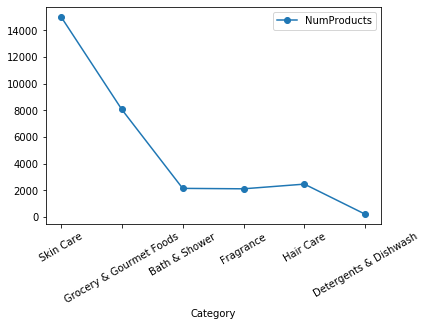

In [37]:
# YOUR CODE HERE
df = pd.DataFrame({'Category': num_products_each_category.index,
                   'NumProducts': np.array(num_products_each_category.values)})

df.plot.line(x='Category', y='NumProducts', marker='o' ,rot = 30 )

In [52]:
# YOUR CODE HERE
gb_arrest_year = product_df.groupby(['Category','Stock Availibility']).size()


gb_arrest_year.name = "Total"

df_arrest_year = gb_arrest_year.to_frame()
df_arrest_year


# multi_district_ratio = vl_beat_district[vl_beat_district>=2].count()/vl_beat_district.count()
arrest_ratio_each_year = df_arrest_year.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
arrest_ratio_each_year = arrest_ratio_each_year.reset_index()
# arrest_ratio_each_year = arrest_ratio_each_year[==True]
arrest_ratio_each_year = arrest_ratio_each_year[arrest_ratio_each_year['Stock Availibility']=="YES"]
arrest_ratio_each_year = arrest_ratio_each_year.set_index('Category')

# index = arrest_ratio_each_year['Year']
arrest_ratio_each_year = arrest_ratio_each_year['Total']
# arrest_ratio_each_year = arrest_ratio_each_year.reindex(index)
arrest_ratio_each_year

Category
Bath & Shower              0.978505
Detergents & Dishwash      0.994924
Fragrance                  0.997152
Grocery & Gourmet Foods    0.997272
Hair Care                  0.990240
Skin Care                  0.974855
Name: Total, dtype: float64

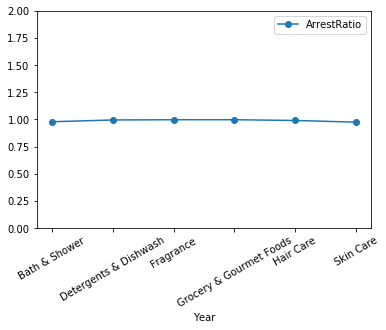

In [59]:
# YOUR CODE HERE
df = pd.DataFrame({'Year': arrest_ratio_each_year.index,
                   'ArrestRatio': arrest_ratio_each_year.values})

df.plot.line(x='Year', y='ArrestRatio', marker='o' , ylim = (0,2) ,rot =30)


In [46]:
arrest_ratio_each_year

Series([], Name: Total, dtype: float64)

In [20]:
top1_locs = top1.sort_values(ascending = True)[:10]


In [21]:
top1_locs

Category   price is reduced
Skin Care  75704.0000          1
           250.0050            1
           250.0100            1
           250.0146            1
           250.0225            1
           2592.1283           1
           250.0305            1
           250.0323            1
           2600.6400           1
           250.9850            1
dtype: int64

## Đưa ra câu hỏi có ý nghĩa cần trả lời

### Với các sản phẩm ở mỗi tháng, tỉ lệ sản phẩm có hàng tồn kho tính đến thời điểm dữ liệu được thu thập là bao nhiêu?

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Bước 1: Tính tỉ lệ (từ 0 đến 1) bắt được thủ phạm của mỗi năm (năm ở đây là năm xảy ra các vụ phạm tội, còn bắt được hay không bắt được là tính tới thời điểm dữ liệu được thu thập). Bạn lưu kết quả vào series `arrest_ratio_each_year`, trong đó index là năm.
- Bước 2: Từ kết quả ở trên, bạn vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là tỉ lệ bị bắt. Bạn dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Bạn đặt tên trục hoành là "Year" và tên trục tung là "ArrestRatio". Ngoài ra, bạn cũng cần chỉnh miền giá trị của trục tung là từ 0 đến 1.

### Số lượng thể loại sản phẩm thay đổi như thế nào theo tháng?
Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Bước 1: Tính số sản phầm của mỗi tháng. Bạn lưu kết quả vào series `num_product_each_month`, trong đó index là tháng.
- Bước 2: Từ kết quả ở trên, bạn vẽ đồ thị dạng line, trong đó trục hoành là tháng và trục tung là số sản phầm của mỗi tháng. Bạn dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Bạn đặt tên trục hoành là "Month" và tên trục tung là "NumProducts".


Bạn sẽ thấy tỉ lệ bị bắt nhìn chung là giảm trong các năm gần đây. Tại sao lại như vậy? Nói chung là ta không biết chắc được. Nhưng bạn thử suy nghĩ và đưa ra một giả thuyết để giải thích cho xu hướng này dựa vào thông tin sau: năm ở đây là năm xảy ra vụ phạm tội, bắt được hay không bắt được là tính đến thời điểm dữ liệu được thu thập (dữ liệu này được thu thập vào khoảng năm 2012-2013, là thời điểm mở của khóa học "The Analytics Edge").

### 2 loại sản phẩm nào thường được thu thập từ những dịp mùa xuân đến hết mùa hè?(từ thăng 1 đến tháng 6) (0.75đ)

Loại địa điểm ở đây được lưu trong cột "LocationDescription". Năm loại địa điểm trong câu hỏi là không tính "OTHER". Bạn lưu kết quả vào list `top5_locs` theo thứ tự phần tử đầu tiên là có nhiều vụ phạm tội nhất, phần tử thứ hai là có nhiều vụ phạm tội nhì, ...

### Trong 6 tháng đầu năm của năm 2019, số lượng sản phẩm thay đổi như thế nào theo tháng? (1đ)

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Bước 1: Tính dataframe `num_thefts_each_month_df` gồm có 3 cột (tên là 2010, 2011, 2012) ứng với số lượng vụ phạm tội theo các tháng của 3 năm, và 12 dòng (tên là 1, 2, ..., 12) ứng với 12 tháng.  
- Bước 2: Từ kết quả ở trên, bạn vẽ 3 đường dạng line (ứng với 3 năm) trên cùng một đồ thị, trong đó trục hoành là tháng và trục tung là số lượng vụ phạm tội. Bạn dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Bạn đặt tên trục hoành là "Month" và tên trục tung là "NumThefts". Bạn cũng cần dùng legend để ghi chú là đường nào thì ứng với năm nào.

Bạn có thể thấy xu hướng của các loại sản phẩm có sự thay đổi rõ của 6 tháng đầu. Tại sao lại như vậy?

## Tiền xử lý (nếu cần) + phân tích dữ liệu để trả lời cho câu hỏi 1

## Tiền xử lý (nếu cần) + phân tích dữ liệu để trả lời cho câu hỏi 2